# [Mini-Project] -> Metacercaria classification with 4 models

## 1.1) Create dataset

In [47]:
import numpy as np

np.random.seed(42)
SAMPLE = 1000
percentage_error = 0.04
metacercaria = []
confidence_score = 10

data_range = {
    'encyst': (175, 195),
    'wall': (5, 8),
    'body_width': (115, 133),
    'body_height': (173, 198),
    'oral_width': (48, 70),
    'oral_height': (30, 35),
    'ventral_width': (35, 45),
    'ventral_height': (15, 20),
    'pharynx_width': (18, 23),
    'pharynx_height': (38, 48),
    'ex_bladder_width': (38, 45),
    'ex_bladder_height': (63, 73)
}

data_list = {
    'encyst': [],
    'wall': [],
    'body_width': [],
    'body_height': [],
    'oral_width': [],
    'oral_height': [],
    'ventral_width': [],
    'ventral_height': [],
    'pharynx_width': [],
    'pharynx_height': [],
    'ex_bladder_width': [],
    'ex_bladder_height': []
}

for index, key  in enumerate(data_range):
    ceil = data_range[key][0] - int(data_range[key][0] * percentage_error)
    floor = data_range[key][1] + int(data_range[key][1] * percentage_error)
    data_list[key] = np.random.randint(ceil, floor+1, SAMPLE)
    print("{} : {}".format(key, len(data_list[key])))

for i in range(SAMPLE):
    score = 0
    for index, key in enumerate(data_range):
        if data_range[key][0] <= data_list[key][i] <= data_range[key][1]:
            score += 1
    #print("score : {}".format(score))
    metacercaria.append(1 if score >= confidence_score else 0)
    
print("\nMetacercaria : {}".format(metacercaria.count(1)))
print("Non-metacercaria : {}".format(metacercaria.count(0)))

encyst : 1000
wall : 1000
body_width : 1000
body_height : 1000
oral_width : 1000
oral_height : 1000
ventral_width : 1000
ventral_height : 1000
pharynx_width : 1000
pharynx_height : 1000
ex_bladder_width : 1000
ex_bladder_height : 1000

Metacercaria : 625
Non-metacercaria : 375


## 1.2) Convert raw data to panda dataframe

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data_list)
Y = np.array(metacercaria)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
X.head(10)

,encyst,wall,body_width,body_height,oral_width,oral_height,ventral_width,ventral_height,pharynx_width,pharynx_height,ex_bladder_width,ex_bladder_height
0,196,6,121,197,58,32,37,16,18,42,46,73
1,182,5,112,186,55,34,35,19,23,38,37,61
2,175,8,135,190,51,29,43,19,23,37,43,61
3,188,6,128,191,56,34,36,18,23,42,37,72
4,186,5,135,202,50,31,44,16,21,38,43,72
5,190,5,117,187,51,36,44,19,18,42,46,64
6,178,7,134,196,56,31,38,16,20,46,44,62
7,178,5,125,190,57,33,38,19,18,44,45,63
8,191,6,121,196,67,30,39,15,21,38,39,71
9,191,6,128,188,70,31,46,17,19,47,40,69


## 1.3) Evaluate function

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred)
    clf_report = classification_report(y_true, y_pred, zero_division=0)

    print('Y_true of [Metacercaria] : {}'.format(np.sum(y_true == 1)))
    print('Y_pred of [Metacercaria] : {}'.format(np.sum(y_pred == 1)))
    print('Y_true of [Non-metecercaria] : {}'.format(np.sum(y_true == 0)))
    print('Y_pred of [Non-metacercaria] : {}'.format(np.sum(y_pred == 0)))
    print('Accuracy : {:.2f}%'.format(accuracy*100))
    print('Precision : {:.2f}%'.format(precision*100))
    print('Recall : {:.2f}%'.format(recall*100))
    print('F1 : {:.2f}%'.format(f1*100))
    print(clf_report)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Metacercaria", "Metacercaria"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

## 2.) Naive bayes model

Y_true of [Metacercaria] : 126
Y_pred of [Metacercaria] : 200
Y_true of [Non-metecercaria] : 74
Y_pred of [Non-metacercaria] : 0
Accuracy : 63.00%
Precision : 63.00%
Recall : 100.00%
F1 : 77.30%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.63      1.00      0.77       126

    accuracy                           0.63       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.40      0.63      0.49       200



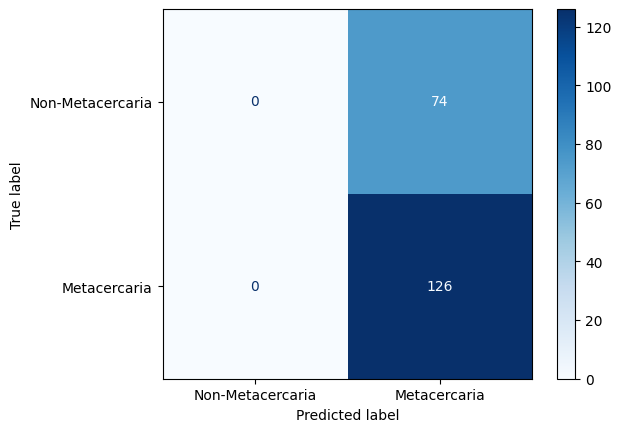

In [50]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb = nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
evaluate(Y_test, Y_pred)

## 3.) Decision tree classifier model

Y_true of [Metacercaria] : 126
Y_pred of [Metacercaria] : 125
Y_true of [Non-metecercaria] : 74
Y_pred of [Non-metacercaria] : 75
Accuracy : 68.50%
Precision : 75.20%
Recall : 74.60%
F1 : 74.90%
              precision    recall  f1-score   support

           0       0.57      0.58      0.58        74
           1       0.75      0.75      0.75       126

    accuracy                           0.69       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.69      0.69      0.69       200



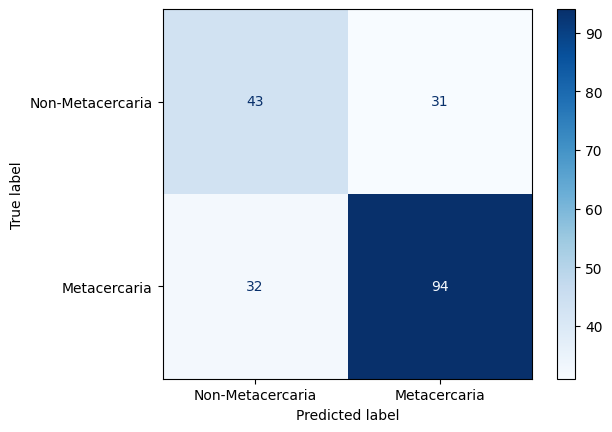

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

evaluate(Y_test, Y_pred)

## 4.) Multi-Layer Perceptron model

Y_true of [Metacercaria] : 126
Y_pred of [Metacercaria] : 185
Y_true of [Non-metecercaria] : 74
Y_pred of [Non-metacercaria] : 15
Accuracy : 67.50%
Precision : 66.49%
Recall : 97.62%
F1 : 79.10%
              precision    recall  f1-score   support

           0       0.80      0.16      0.27        74
           1       0.66      0.98      0.79       126

    accuracy                           0.68       200
   macro avg       0.73      0.57      0.53       200
weighted avg       0.71      0.68      0.60       200



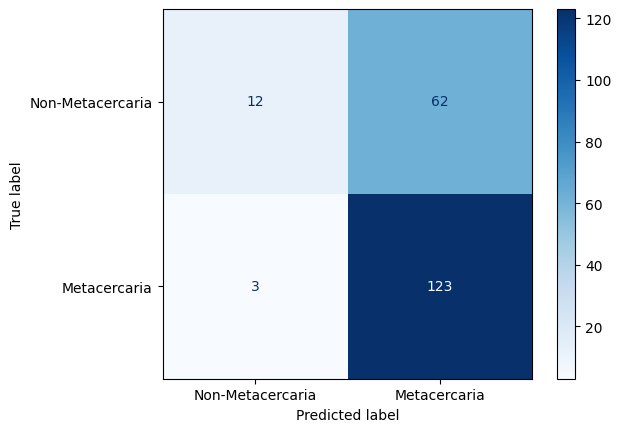

In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp = mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)

evaluate(Y_test, Y_pred)

## 5.) Ensemble model (Naive bayes, Decision tree, MLP)

Y_true of [Metacercaria] : 126
Y_pred of [Metacercaria] : 195
Y_true of [Non-metecercaria] : 74
Y_pred of [Non-metacercaria] : 5
Accuracy : 65.50%
Precision : 64.62%
Recall : 100.00%
F1 : 78.50%
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        74
           1       0.65      1.00      0.79       126

    accuracy                           0.66       200
   macro avg       0.82      0.53      0.46       200
weighted avg       0.78      0.66      0.54       200



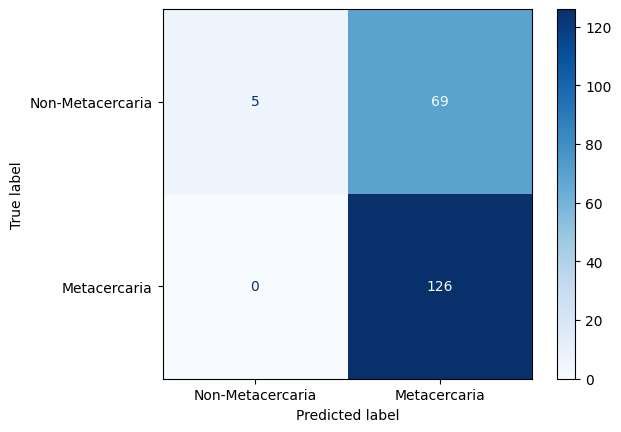

In [53]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier()
nb = BernoulliNB()
mlp = MLPClassifier()

ensemble = VotingClassifier(estimators=[
    ('decision_tree', dt),
    ('naive_bayes', nb),
    ('multi_layer_perceptron', mlp)
])

ensemble.fit(X_train, Y_train)
Y_pred = ensemble.predict(X_test)

evaluate(Y_test, Y_pred)